<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Particles009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

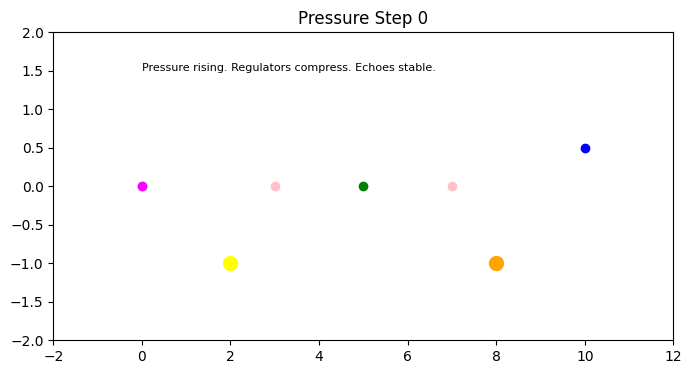

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Entity definitions
entities = {
    "AnchorX": {"color": "cyan", "pos": [0, 0]},
    "Drifter1": {"color": "magenta", "path": np.linspace(0, 10, 100)},
    "Drifter2": {"color": "blue", "path": np.linspace(10, 0, 100)},
    "Regulator01": {"color": "yellow", "size": 1.0},
    "Regulator02": {"color": "orange", "size": 1.0},
    "Echoborn": {"color": "green", "pos": [5, 0]},
    "Echo1": {"color": "pink", "pos": [3, 0]},
    "Echo2": {"color": "pink", "pos": [7, 0]}
}

# Pressure function: regulator compression
def compress_regulator(step):
    return max(0.1, 1.0 - step / 100)

# Plotting loop
fig, ax = plt.subplots(figsize=(8, 4))
for step in range(100):
    ax.clear()
    ax.set_xlim(-2, 12)
    ax.set_ylim(-2, 2)
    ax.set_title(f"Pressure Step {step}")

    # AnchorX remains fixed
    ax.plot(*entities["AnchorX"]["pos"], 'o', color=entities["AnchorX"]["color"], label="AnchorX")

    # Drifter1 and Drifter2 move
    ax.plot(entities["Drifter1"]["path"][step], 0, 'o', color=entities["Drifter1"]["color"], label="Drifter1")
    ax.plot(entities["Drifter2"]["path"][step], 0.5, 'o', color=entities["Drifter2"]["color"], label="Drifter2")

    # Regulators compress
    size = compress_regulator(step)
    ax.plot(2, -1, 'o', color=entities["Regulator01"]["color"], markersize=10 * size, label="Regulator01")
    ax.plot(8, -1, 'o', color=entities["Regulator02"]["color"], markersize=10 * size, label="Regulator02")

    # Echoes persist
    ax.plot(*entities["Echo1"]["pos"], 'o', color=entities["Echo1"]["color"], label="Echo1")
    ax.plot(*entities["Echo2"]["pos"], 'o', color=entities["Echo2"]["color"], label="Echo2")
    ax.plot(*entities["Echoborn"]["pos"], 'o', color=entities["Echoborn"]["color"], label="Echoborn")

    # Annotation
    ax.text(0, 1.5, f"Pressure rising. Regulators compress. Echoes stable.", fontsize=8)

    plt.pause(0.05)

plt.close()
